# 3.1 Practica. Análisis, implementación y prueba de una máquina de aprendizaje supervisado (Parte I).

## Introducción de la actividad.

Dada una base de datos 𝐷={𝑡1,𝑡2,…,𝑡𝑛} de tuplas o registros (individuos) y un conjunto de clases 𝐶={𝐶1,𝐶2,…,𝐶𝑚}, el problema de la clasificación es encontrar una función 𝑓:𝐷→𝐶 tal que cada 𝑡𝑖 es asignada una clase 𝐶𝑗. 𝑓:𝐷→𝐶 podría ser KNN, un Árbol de Decisión, un Modelo Bayesiano, etc.

El análisis, implementación y prueba de una máquina de aprendizaje supervisado (Parte I: KNN, un Árbol de Decisión, un Modelo Bayesiano), permitirá comprender el funcionamiento de forma clara y precisa.

## Propósito de la actividad

Comprender el funcionamiento de las máquinas de aprendizaje supervisado (Parte I: KNN, un Árbol de Decisión, un Modelo Bayesiano).

## Instrucciones

Analicé, implemente y pruebe una máquina de aprendizaje supervisado (Parte I: KNN, un Árbol de Decisión, un Modelo Bayesiano), la implementación de la máquina será en el lenguaje de su preferencia. La práctica deberá ser presentada en un archivo PDF, que deberá contener:

- Portada
- Análisis de la máquina de aprendizaje supervisado (funcionamiento del algoritmo).
- Implementación de la máquina de aprendizaje supervisado (implementación del algoritmo).
- Prueba de la máquina de aprendizaje supervisado (prueba del algoritmo).
- Conclusiones.

## Análisis del Algoritmo KNN

### ¿Qué es KNN?

KNN (*K-Nearest Neighbors*) es un algoritmo de clasificación basado en la **similitud entre datos**.  
No construye un modelo explícito durante el entrenamiento, sino que clasifica nuevos datos comparándolos directamente con los ejemplos almacenados en el conjunto de entrenamiento.

### Funcionamiento general

1. Se elige un valor de **K** (número de vecinos).
2. Para un nuevo dato:
   - Se calcula la distancia entre el nuevo dato y todos los datos de entrenamiento.
   - Se seleccionan los **K vecinos más cercanos**.
   - Se asigna la clase que aparece con mayor frecuencia entre esos vecinos.

### Distancia más usada

La distancia más comúnmente utilizada en KNN es la **distancia euclidiana**, definida como:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

donde:
- \(x\) y \(y\) son dos puntos en el espacio de características  
- \(n\) es el número de atributos

### Ventajas

- Fácil de entender e implementar
- No requiere una fase de entrenamiento compleja
- Funciona bien con conjuntos de datos pequeños

### Desventajas

- Computacionalmente costoso cuando el conjunto de datos es grande
- Sensible a la elección del valor de **K**
- Sensible a diferencias de escala entre las variables


## Conjunto de datos

Se utilizará un conjunto de datos sencillo relacionado con clientes de una tienda para predecir si compran o no un producto según:

- Edad

- Ingreso mensual

Clases:

- 0 → No compra

- 1 → Sí compra

## Implementación del Algoritmo KNN (Python)

### Importación de librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

### Creación del dataset

In [3]:
data = {
    "Edad": [22, 25, 47, 52, 46, 56, 55, 60, 28, 30],
    "Ingreso": [15000, 18000, 45000, 52000, 48000, 60000, 58000, 62000, 20000, 22000],
    "Compra": [0, 0, 1, 1, 1, 1, 1, 1, 0, 0]
}

df = pd.DataFrame(data)
df


,Edad,Ingreso,Compra
0,22,15000,0
1,25,18000,0
2,47,45000,1
3,52,52000,1
4,46,48000,1
5,56,60000,1
6,55,58000,1
7,60,62000,1
8,28,20000,0
9,30,22000,0


### Visualización de los datos

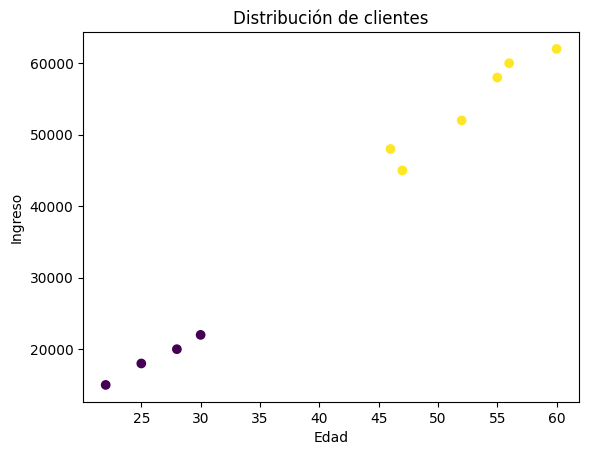

In [4]:
plt.scatter(df["Edad"], df["Ingreso"], c=df["Compra"])
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.title("Distribución de clientes")
plt.show()

### Separación de variables

In [5]:
X = df[["Edad", "Ingreso"]]
y = df["Compra"]

### División en entrenamiento y prueba

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Escalado de datos

KNN es sensible a las escalas, por lo que se normalizan los datos:

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Entrenamiento del modelo KNN

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Prueba del modelo KNN

In [16]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1])

In [17]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [18]:
confusion_matrix(y_test, y_pred)

array([[2, 0],
       [0, 1]])

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



### Clasificación de un nuevo cliente

In [ ]:
nuevo_cliente = pd.DataFrame(
    [[35, 30000]],
    columns=["Edad", "Ingreso"]
)

nuevo_cliente_escalado = scaler.transform(nuevo_cliente)
prediction = knn.predict(nuevo_cliente_escalado)

prediction


array([0])

El modelo predice que el nuevo cliente **no realizará la compra** (clase 0),
considerando su edad y nivel de ingreso en comparación con los clientes
más cercanos del conjunto de entrenamiento.

## Conclusiones

- El algoritmo KNN es una técnica efectiva y sencilla para problemas de clasificación supervisada.
- No requiere una fase de entrenamiento compleja, ya que basa sus decisiones en la similitud entre datos.
- El escalado de variables es fundamental para obtener buenos resultados.
- El valor de K influye directamente en la precisión del modelo.
- KNN es ideal para fines educativos y conjuntos de datos pequeños.

## Referencias

[Repositorio de GitHub con Jupiter Notebook de la Practica.](https://github.com/RKCbas/Maestria-en-Inteligencia-Artificial---Practicas/blob/main/Cuatrimestre%201/2%20-%20Inteligencia%20artificial%20en%20la%20transformacion%20digital/Practica%203.1.ipynb)